<a href="https://colab.research.google.com/github/MuhammadHatta72/pcvk-semester5/blob/main/meet10/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Thresholding
##Muhammad Hatta (2141720021)
##TI-3A
##Kelompok 5
####1. Dandy Wahyu Syahputra (2141720002)
####2. Muhammad Hatta (2141720021)
####3. Sabbaha Naufal Erwanda (2141720221)
##KELAS TI - 3A

##1. Import Library

In [2]:
!pip install pytesseract

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

##2. Load Data

In [3]:
# Load Data gradient
gradient = cv2.imread('/content/drive/MyDrive/PCVK/Meet10/gradient.jpg')
gradient = cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB)

##3. Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO TOZERO_INV) dengan Library

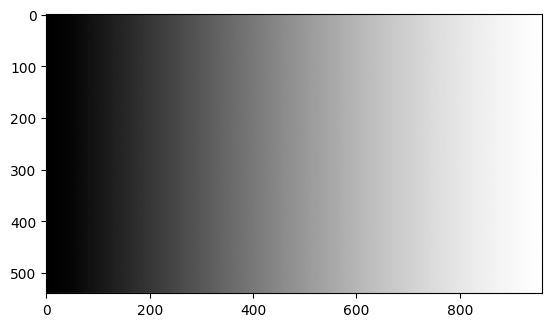

In [4]:
plt.imshow(gradient)

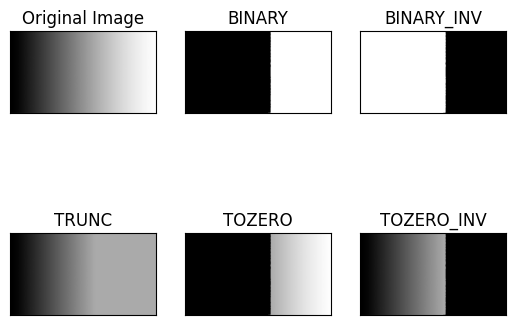

In [5]:
ret,thresh1 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gradient,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gradient,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gradient,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
gambar_gradientm4s = [gradient, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(gambar_gradientm4s[i],'gray',vmin=0,vmax=255)  # vmin vmax untuk mengatur jangkauan intensitas piksel
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # menyembunyikan label sumbu x dan sumbu y

plt.show()

##4. Otsu's Thresholding

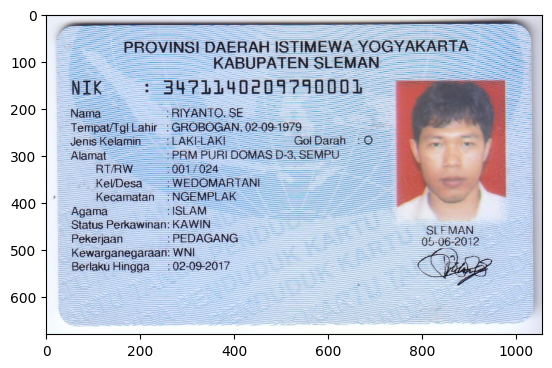

In [6]:
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Meet 7/KTP/ktp.png')
ktp = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)

plt.imshow(ktp)

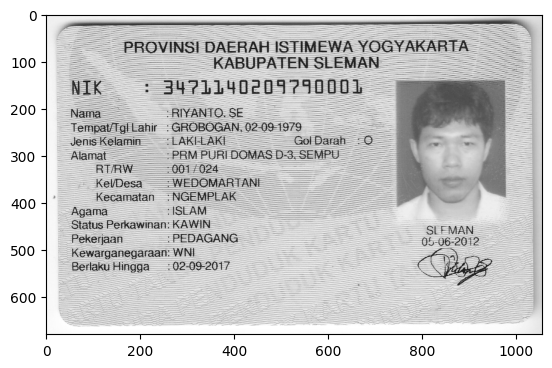

In [9]:
# Ubah citra ke grayscale dengan library
ktp_gray = cv2.imread('/content/drive/MyDrive/PCVK/Meet 7/KTP/ktp.png',0)
plt.imshow(ktp_gray, cmap='gray')

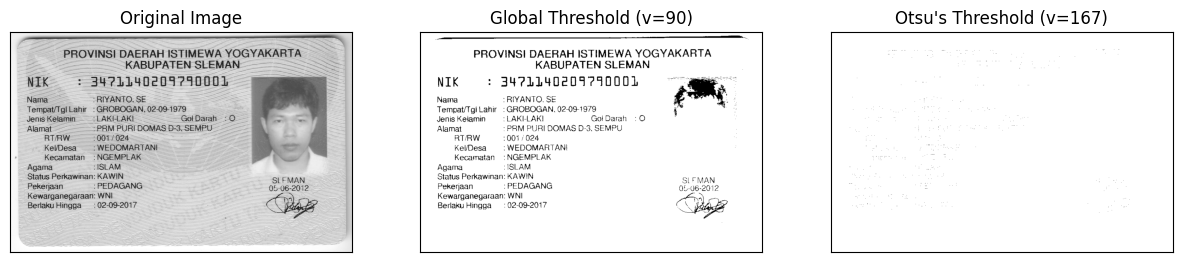

In [11]:
# Ubah citra grayscale tanpa library
import cv2
import numpy as np

def _compute_otsu_criteria(img, threshold):
    # Compute histogram for pixels below and above threshold
    hist_low = np.sum(img < threshold)
    hist_high = np.sum(img >= threshold)

    # Compute probabilities for pixels below and above threshold
    prob_low = hist_low / img.size
    prob_high = hist_high / img.size

    # Compute mean pixel values for pixels below and above threshold
    mean_low = np.mean(img[img < threshold]) if hist_low > 0 else 0
    mean_high = np.mean(img[img >= threshold]) if hist_high > 0 else 0

    # Compute between-class variance
    variance = prob_low * prob_high * (mean_low - mean_high) ** 2

    return variance


def otsuThresholding(img: np.ndarray) -> np.ndarray:
    threshold_range = range(np.max(img)+1)
    criterias = np.array([_compute_otsu_criteria(img, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    binary = img.copy()
    binary[binary > best_threshold] = 255
    binary[binary <= best_threshold] = 0

    return binary

if __name__ == '__main__':
    filename = '/content/drive/MyDrive/PCVK/Meet 7/KTP/ktp.png'
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Global Threshold (v=90)
    global_threshold = 90
    glob_th, global_thresholded = cv2.threshold(img, global_threshold, 255, cv2.THRESH_BINARY)

    # Otsu Thresholding
    otsu_thresholded = otsuThresholding(img)
    otsu_th, otsu_thresholded = cv2.threshold(otsu_thresholded, 167, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, 'gray')
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 2)
    plt.imshow(global_thresholded, 'gray')
    plt.title(f'Global Threshold (v={global_threshold})')
    plt.xticks([]), plt.yticks([])

    plt.subplot(1, 3, 3)
    plt.imshow(otsu_thresholded, 'gray')
    plt.title("Otsu's Threshold (v=167)")
    plt.xticks([]), plt.yticks([])

    plt.show()

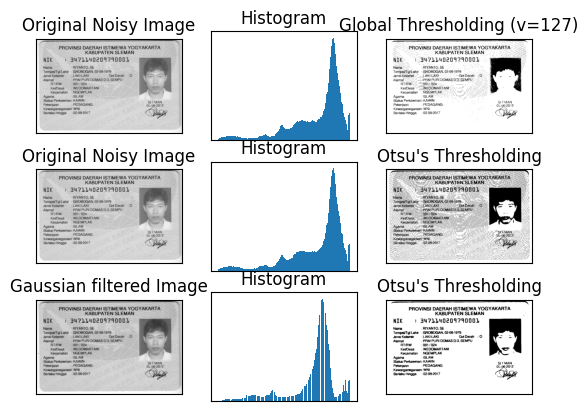

In [12]:
# global thresholding
global_threshold,th1 = cv2.threshold(ktp_gray,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
otsu_threshold,th2 = cv2.threshold(ktp_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(ktp_gray,(5,5),0)
otsu_gaussian,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [ktp_gray, 0, th1,
          ktp_gray, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

##5. Histogram dari Citra Tersegmentasi (Histogram Foreground saja)

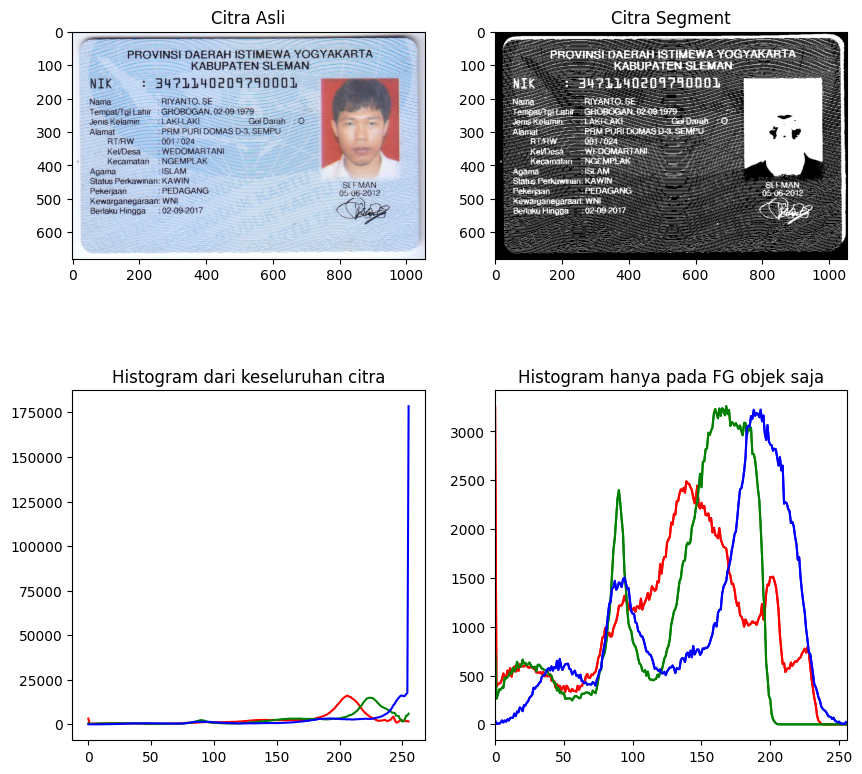

In [13]:
ktp = ('/content/drive/MyDrive/PCVK/Meet 7/KTP/ktp.png')
img_l = cv2.imread(ktp)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

##6. Segmentasi Warna pada image 'ktp_riyanto.png'. Munculkan warna biru saja. (K-Means)

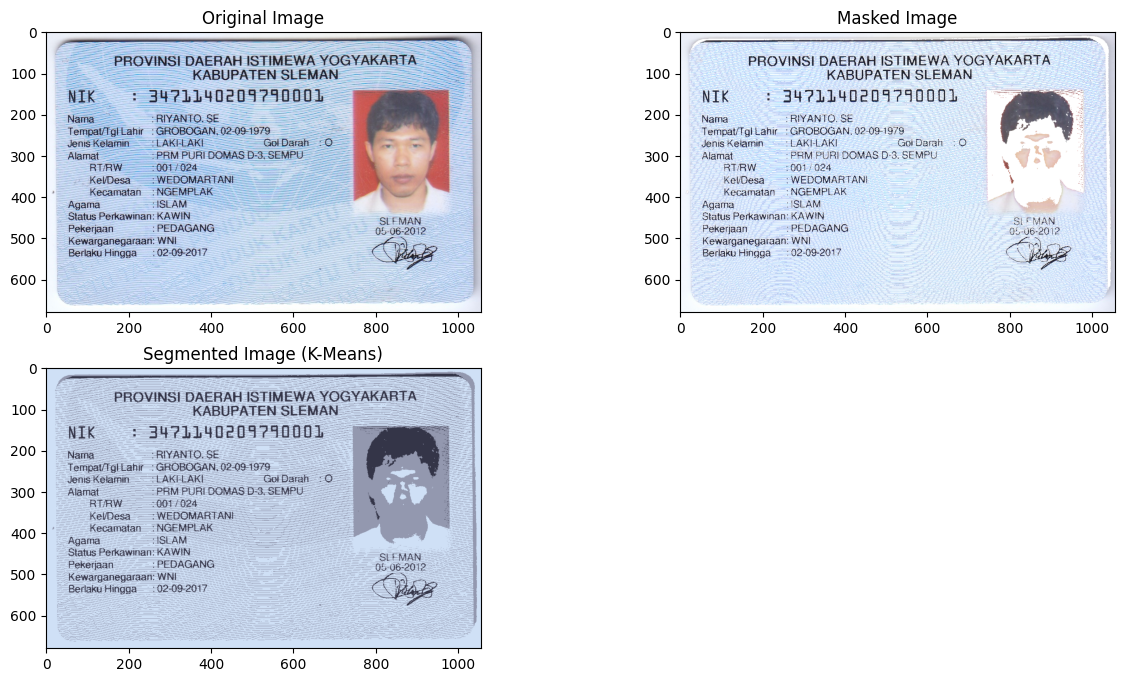

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
ktp = '/content/drive/MyDrive/PCVK/Meet 7/KTP/ktp.png'
img = cv2.imread(ktp)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
# K-Means dari library openCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()